In [618]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

national_results = pd.read_csv('/Users/danielsagher/Dropbox/Documents/General Assembly/Class Projects/capstone/csv/national_results.csv')
state_results = pd.read_csv('/Users/danielsagher/Dropbox/Documents/General Assembly/Class Projects/capstone/csv/state_results.csv')
national_series_dimension = pd.read_csv('/Users/danielsagher/Dropbox/Documents/General Assembly/Class Projects/capstone/csv/national_series_dimension.csv')
state_series_dimension = pd.read_csv('/Users/danielsagher/Dropbox/Documents/General Assembly/Class Projects/capstone/csv/state_series_dimension.csv')
survey_table = pd.read_csv('/Users/danielsagher/Dropbox/Documents/General Assembly/Class Projects/capstone/csv/survey_table.csv')



In [630]:
national_results

,Unnamed: 0,seriesID,year,period,period_name,value,footnotes
0,0,WSU100,2021,M12,December,1,[{}]
1,1,WSU100,2021,M11,November,1,[{}]
2,2,WSU100,2021,M10,October,4,[{}]
3,3,WSU100,2021,M09,September,1,[{}]
4,4,WSU100,2021,M08,August,1,[{}]
...,...,...,...,...,...,...,...
40150,40150,LEU0252919700,2003,Q01,1st Quarter,1104,[{}]
40151,40151,LEU0252919700,2002,Q04,4th Quarter,1125,[{}]
40152,40152,LEU0252919700,2002,Q03,3rd Quarter,1101,[{}]
40153,40153,LEU0252919700,2002,Q02,2nd Quarter,1105,[{}]


In [620]:
merged_national = pd.merge(national_results, national_series_dimension, how='left', on='seriesID')
merged_national


,Unnamed: 0_x,seriesID,year,period,period_name,value,footnotes,Unnamed: 0_y,series,survey,is_adjusted
0,0,WSU100,2021,M12,December,1,[{}],0,"Number of work stoppages, beginning in the per...",WSP,f
1,1,WSU100,2021,M11,November,1,[{}],0,"Number of work stoppages, beginning in the per...",WSP,f
2,2,WSU100,2021,M10,October,4,[{}],0,"Number of work stoppages, beginning in the per...",WSP,f
3,3,WSU100,2021,M09,September,1,[{}],0,"Number of work stoppages, beginning in the per...",WSP,f
4,4,WSU100,2021,M08,August,1,[{}],0,"Number of work stoppages, beginning in the per...",WSP,f
...,...,...,...,...,...,...,...,...,...,...,...
42790,40150,LEU0252919700,2003,Q01,1st Quarter,1104,[{}],323,"Median wkly earns, Emp FT, Wag & sal wrkrs, Ad...",CPS,f
42791,40151,LEU0252919700,2002,Q04,4th Quarter,1125,[{}],323,"Median wkly earns, Emp FT, Wag & sal wrkrs, Ad...",CPS,f
42792,40152,LEU0252919700,2002,Q03,3rd Quarter,1101,[{}],323,"Median wkly earns, Emp FT, Wag & sal wrkrs, Ad...",CPS,f
42793,40153,LEU0252919700,2002,Q02,2nd Quarter,1105,[{}],323,"Median wkly earns, Emp FT, Wag & sal wrkrs, Ad...",CPS,f


In [621]:
merged_national.isnull().sum()

Unnamed: 0_x    0
seriesID        0
year            0
period          0
period_name     0
value           0
footnotes       0
Unnamed: 0_y    0
series          0
survey          0
is_adjusted     0
dtype: int64

In [278]:
merged_national[['seriesID', 'year']][merged_national.year.isnull()]

,seriesID,year


In [623]:
merged_national.year[merged_national.year.isnull()]

Series([], Name: year, dtype: int64)

In [624]:
merged_national.loc[merged_national.duplicated()]

,Unnamed: 0_x,seriesID,year,period,period_name,value,footnotes,Unnamed: 0_y,series,survey,is_adjusted


In [627]:
merged_national = merged_national.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'])

In [628]:
merged_national.drop_duplicates(inplace= True)

In [629]:
merged_national

,seriesID,year,period,period_name,value,footnotes,series,survey,is_adjusted
0,WSU100,2021,M12,December,1,[{}],"Number of work stoppages, beginning in the per...",WSP,f
1,WSU100,2021,M11,November,1,[{}],"Number of work stoppages, beginning in the per...",WSP,f
2,WSU100,2021,M10,October,4,[{}],"Number of work stoppages, beginning in the per...",WSP,f
3,WSU100,2021,M09,September,1,[{}],"Number of work stoppages, beginning in the per...",WSP,f
4,WSU100,2021,M08,August,1,[{}],"Number of work stoppages, beginning in the per...",WSP,f
...,...,...,...,...,...,...,...,...,...
42790,LEU0252919700,2003,Q01,1st Quarter,1104,[{}],"Median wkly earns, Emp FT, Wag & sal wrkrs, Ad...",CPS,f
42791,LEU0252919700,2002,Q04,4th Quarter,1125,[{}],"Median wkly earns, Emp FT, Wag & sal wrkrs, Ad...",CPS,f
42792,LEU0252919700,2002,Q03,3rd Quarter,1101,[{}],"Median wkly earns, Emp FT, Wag & sal wrkrs, Ad...",CPS,f
42793,LEU0252919700,2002,Q02,2nd Quarter,1105,[{}],"Median wkly earns, Emp FT, Wag & sal wrkrs, Ad...",CPS,f


In [617]:
natdf = national_results
natdf

,seriesID,year,period,period_name,value,footnotes,series,survey,is_adjusted
0,WSU100,2021,M12,December,1,[{}],NaN,WSP,f
1,WSU100,2021,M11,November,1,[{}],NaN,WSP,f
2,WSU100,2021,M10,October,4,[{}],NaN,WSP,f
3,WSU100,2021,M09,September,1,[{}],NaN,WSP,f
4,WSU100,2021,M08,August,1,[{}],NaN,WSP,f
...,...,...,...,...,...,...,...,...,...
42790,LEU0252919700,2003,Q01,1st Quarter,1104,[{}],NaN,CPS,f
42791,LEU0252919700,2002,Q04,4th Quarter,1125,[{}],NaN,CPS,f
42792,LEU0252919700,2002,Q03,3rd Quarter,1101,[{}],NaN,CPS,f
42793,LEU0252919700,2002,Q02,2nd Quarter,1105,[{}],NaN,CPS,f


In [612]:
natdf.to_excel\
('/Users/danielsagher/Dropbox/Documents/General Assembly/Class Projects/capstone/python_files/to_excel/natdf.xlsx')

In [613]:
natdf

,seriesID,year,period,period_name,value,footnotes,series,survey,is_adjusted
0,WSU100,2021,M12,December,1,[{}],NaN,WSP,f
1,WSU100,2021,M11,November,1,[{}],NaN,WSP,f
2,WSU100,2021,M10,October,4,[{}],NaN,WSP,f
3,WSU100,2021,M09,September,1,[{}],NaN,WSP,f
4,WSU100,2021,M08,August,1,[{}],NaN,WSP,f
...,...,...,...,...,...,...,...,...,...
42790,LEU0252919700,2003,Q01,1st Quarter,1104,[{}],NaN,CPS,f
42791,LEU0252919700,2002,Q04,4th Quarter,1125,[{}],NaN,CPS,f
42792,LEU0252919700,2002,Q03,3rd Quarter,1101,[{}],NaN,CPS,f
42793,LEU0252919700,2002,Q02,2nd Quarter,1105,[{}],NaN,CPS,f


In [572]:
natdf['value'] = natdf['value'].replace('-', 0)
natdf['value'] = natdf['value'].astype('float')
natdf['value'] = natdf['value'].astype('int')

In [585]:
natdf.query('survey == "CES"').seriesID.unique()

array(['CES0000000001', 'CES3000000001', 'CES0500000001', 'CES9000000001',
       'CES0500000003', 'CEU0000000001', 'CES2000000001', 'CES1021100001',
       'CES6000000001', 'CES7000000001', 'CES8000000001', 'CES1000000001',
       'CES5500000001', 'CES6500000001', 'CES5000000001', 'CES0500000002',
       'CES3133100002', 'CES3231300002', 'CES4200000001', 'CES3133200002',
       'CES3232200002', 'CEU6500000002', 'CES3232300002', 'CEU0500000001',
       'CES0500000008'], dtype=object)

In [574]:
CES_df = natdf.query('survey == "CES"') \
        .groupby(['series','seriesID', 'year'])['value']\
        .sum().reset_index()

CES_df['series'] = CES_df.series.str.rstrip()
CES_df


,series,seriesID,year,value
0,"Construction Employment, Seasonally Adjusted",CES2000000001,2002,80584
1,"Construction Employment, Seasonally Adjusted",CES2000000001,2003,80828
2,"Construction Employment, Seasonally Adjusted",CES2000000001,2004,83678
3,"Construction Employment, Seasonally Adjusted",CES2000000001,2005,88001
4,"Construction Employment, Seasonally Adjusted",CES2000000001,2006,92275
...,...,...,...,...
463,"Total Private Employment, Seasonally Adjusted",CES0500000001,2017,1491176
464,"Total Private Employment, Seasonally Adjusted",CES0500000001,2018,1517323
465,"Total Private Employment, Seasonally Adjusted",CES0500000001,2019,1539530
466,"Total Private Employment, Seasonally Adjusted",CES0500000001,2020,1442168


In [631]:
lst = [
'Manufacturing Employment, Seasonally Adjusted', 
'Government Employment, Seasonally Adjusted',
'Construction Employment, Seasonally Adjusted', 
'Oil and Gas Extraction Employment, Seasonally Adjusted', 
'Professional and Business Services Employment, Seasonally Adjusted', 
'Leisure and Hospitality Employment, Seasonally Adjusted', 
'Other Services Employment, Seasonally Adjusted', 
'Mining and Logging Employment, Seasonally Adjusted', 
'Financial Activities Employment, Seasonally Adjusted', 
'Private Education and Health Services Employment, Seasonally Adjusted',
'Information Employment, Seasonally Adjusted',
'Retail Trade Employment, Seasonally Adjusted']

CES_df = CES_df[['seriesID','series', 'year', 'value']][(CES_df['series'].isin(lst))]
CES_df

CES_df.to_excel(excel_writer=\
'/Users/danielsagher/Dropbox/Documents/General Assembly/Class Projects/capstone/python_files/to_excel/nat_employment_query.xlsx'
)


In [606]:
lst = ['Avg hrs per day  Watching TV',
 'Avg hrs per day  Leisure and sports (includes travel)',
 'Avg hrs per day  Socializing and communicating',
 'Avg hrs per day  Caring for and helping household children, Parents with youngest household child 6 - 12 yrs, Men',
 'Avg hrs per day  Caring for and helping household children, Parents with youngest household child 6 - 12 yrs, Women',
 'Avg hrs per day  Caring for and helping household children, Parents of household children under 6 yrs, Men',
 'Avg hrs per day  Caring for and helping household children, Parents of household children under 6 yrs, Women',
 'Avg hrs per day  Housework, Men',
 'Avg hrs per day  Housework, Women',
 'Avg hrs per day  Food preparation and cleanup, Men',
 'Avg hrs per day  Food preparation and cleanup, Women',
 'Avg hrs per day for participants  Working, Employed, Men',
 'Avg hrs per day for participants  Working, Employed, Women']

time_use_df = natdf[['seriesID','series', 'year', 'value']][(natdf.series.isin(lst))]
time_use_df

time_use_df.to_excel(excel_writer=\
'/Users/danielsagher/Dropbox/Documents/General Assembly/Class Projects/capstone/python_files/to_excel/time_use_query.xlsx')

In [ ]:
[Generation: Birth year of 1997 or later 
Generation: Birth year from 1981 to 1996 
Generation: Birth year from 1965 to 1980 
Generation: Birth year from 1946 to 1964 
Generation: Birth year of 1945 or earlier]

In [589]:
natdf['series'] = natdf['series'][(natdf.survey == 'ATUS')].str.strip()

In [549]:
time_use_df.sort_values(by='year')

,seriesID,series,year,value
1648,TUU10101AA01042907,Avg hrs per day Caring for and helping househ...,2003,0
1667,TUU10101AA01042922,Avg hrs per day Caring for and helping househ...,2003,1
1666,TUU10101AA01042922,Avg hrs per day Caring for and helping househ...,2004,1
1647,TUU10101AA01042907,Avg hrs per day Caring for and helping househ...,2004,0
1646,TUU10101AA01042907,Avg hrs per day Caring for and helping househ...,2005,0
1665,TUU10101AA01042922,Avg hrs per day Caring for and helping househ...,2005,1
1664,TUU10101AA01042922,Avg hrs per day Caring for and helping househ...,2006,1
1645,TUU10101AA01042907,Avg hrs per day Caring for and helping househ...,2006,0
1663,TUU10101AA01042922,Avg hrs per day Caring for and helping househ...,2007,1
1644,TUU10101AA01042907,Avg hrs per day Caring for and helping househ...,2007,0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


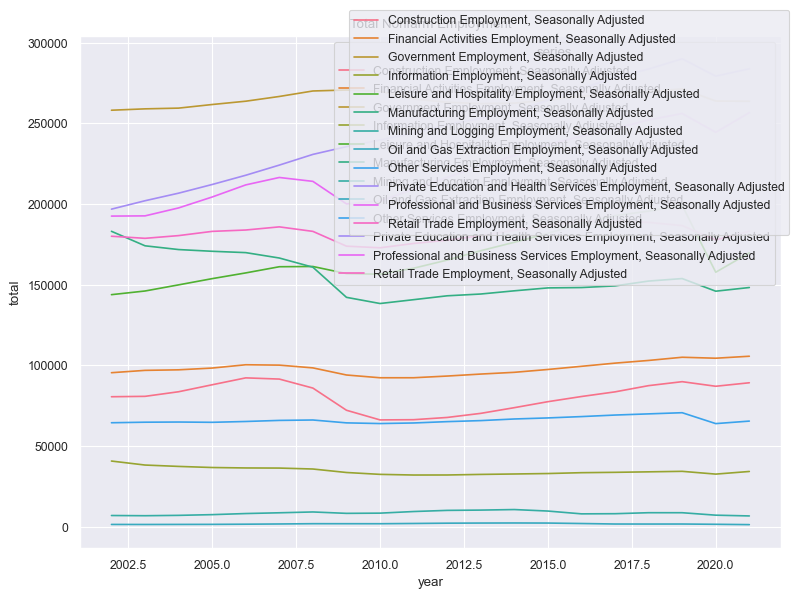

In [494]:
sns.set_theme(context='paper')
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data= CES_df, x= 'year',
                y= 'value',hue='series',
                  ax=ax)


plt.xlabel('year')
plt.ylabel('total')
plt.title('Total Nonfarm Employment')
# sns.move_legend(ax, 'upper right', bbox_to_anchor=(1,1))
fig.legend(loc = 'outside upper right', bbox_to_anchor=(1,1))
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


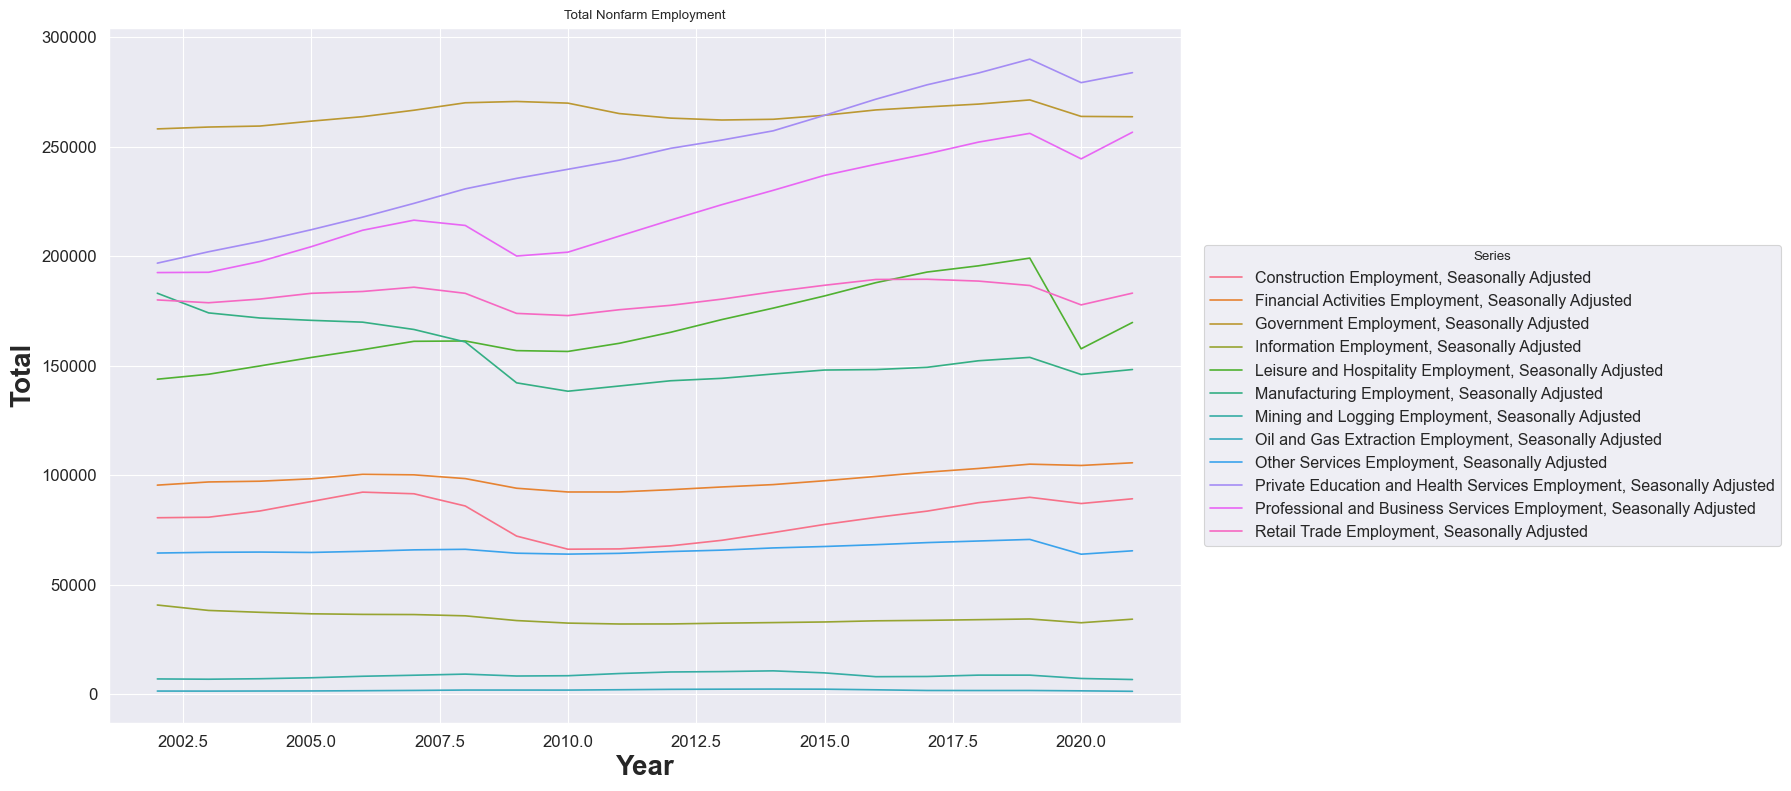

In [515]:
# Setting the theme
sns.set_theme(context='paper')

# Creating the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the width to provide more space for the legend

# Creating the line plot
sns.lineplot(data=CES_df, x='year', y='value', hue='series', ax=ax)

# Setting the labels and title
plt.xlabel('Year', fontsize = '20', fontweight = 'bold')
plt.ylabel('Total',fontsize = '20', fontweight = 'bold')
plt.title('Total Nonfarm Employment')

ax.tick_params(axis='both', which='major', labelsize=12)


# Moving the legend outside the plot using fig.legend
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Series', fontsize='large')


ax.legend_.remove()

# Adjust the layout to make space for the legend
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the right margin to fit the legend

# Showing the plot
plt.show()


In [351]:
# Does current employment have an effect on time usage 

